## Demo of fmm Python API

In [10]:
from fmm import Network,NetworkGraph,FastMapMatch,FastMapMatchConfig,UBODT

### Load network data and graph

In [11]:
network = Network("../data/edges.shp")
print "Nodes {} edges {}".format(network.get_node_count(),network.get_edge_count())
graph = NetworkGraph(network)

Nodes 17 edges 30


### Precompute an UBODT file

**This step can be skipped if you already created one UBODT file.**

In [3]:
from fmm import UBODTGenAlgorithm

In [4]:
ubodt_gen = UBODTGenAlgorithm(network,graph)

In [5]:
status = ubodt_gen.generate_ubodt("../data/ubodt.txt", 4, binary=False, use_omp=True)
print status

Time takes 0.009seconds


### Load UBODT data

In [12]:
ubodt = UBODT.read_ubodt_csv("../data/ubodt.txt")

### Create FMM model

In [13]:
model = FastMapMatch(network,graph,ubodt)

### Define FMM configuration

In [57]:
k = 4
radius = 0.4
gps_error = 0.05
fmm_config = FastMapMatchConfig(k,radius,gps_error)

### Run map matching

#### Match a single trajectory

In [58]:
wkt = "LINESTRING(0.200812146892656 2.14088983050848,1.44262005649717 2.14879943502825,3.06408898305084 2.16066384180791,3.06408898305084 2.7103813559322,3.70872175141242 2.97930790960452,4.11606638418078 2.62337570621469)"

In [59]:
result = model.match_wkt(wkt,fmm_config)

In [60]:
print "Matched path: ", list(result.cpath)
print "Matched edge for each point: ", list(result.opath)
print "Matched edge index ",list(result.indices)
print "Matched geometry: ",result.mgeom.export_wkt()
print "Matched point ", result.pgeom.export_wkt()

Matched path:  [8, 11, 13, 18, 20, 24]
Matched edge for each point:  [8, 11, 18, 18, 20, 24]
Matched edge index  [0, 1, 3, 3, 4, 5]
Matched geometry:  LINESTRING(0.20081215 2,1 2,2 2,3 2,3 3,4 3,4 2.6233757)
Matched point  LINESTRING(0.20081215 2,1.4426201 2,3 2.1606638,3 2.7103814,3.7087218 3,4 2.6233757)


#### Match trajectories in a GPS file

In [14]:
from fmm import GPSConfig,ResultConfig

In [15]:
input_config = GPSConfig()
input_config.file = "../data/trips.csv"
input_config.id = "id"

In [16]:
print input_config.to_string()

gps file : ../data/trips.csv
id column : id
geom column : geom
timestamp column : timestamp
x column : x
y column : y
GPS point : false



In [22]:
result_config = ResultConfig()
result_config.file = "../data/mr.txt"
result_config.output_config.write_opath = True
print result_config.to_string()

Result file : ../data/mr.txt
Output fields: opath cpath mgeom 


In [23]:
status = model.match_gps_file(input_config, result_config, fmm_config)

In [24]:
print status

Time takes 0.05 seconds
Total points 17 matched 17
Map match speed 340 points/s 



### Match a trajectory with reverse movement

This is a trajectory with reverse movement

In [68]:
wkt = "LINESTRING(0.200812146892656 2.14088983050848,1.44262005649717 2.14879943502825,1.40262005649717 2.04879943502825,3.06408898305084 2.16066384180791,3.06408898305084 2.7103813559322,3.70872175141242 2.97930790960452,4.11606638418078 2.62337570621469)"

In [69]:
from shapely.wkt import loads
traj = loads(wkt)

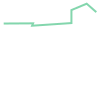

In [70]:
traj

Without setting reverse tolerance, the matched path contains reverse movement

In [77]:
k = 4
radius = 0.4
gps_error = 0.05
fmm_config = FastMapMatchConfig(k,radius,gps_error)
result = model.match_wkt(wkt,fmm_config)
print "Matched path: ", list(result.cpath)
print "Matched edge for each point: ", list(result.opath)
print "Matched edge index ",list(result.indices)
print "Matched geometry: ",result.mgeom.export_wkt()
print "Matched point ", result.pgeom.export_wkt()

Matched path:  [8, 11, 10, 11, 13, 18, 20, 24]
Matched edge for each point:  [8, 10, 10, 18, 18, 20, 24]
Matched edge index  [0, 2, 2, 5, 5, 6, 7]
Matched geometry:  LINESTRING(0.20081215 2,1 2,2 2,1 2,2 2,3 2,3 3,4 3,4 2.6233757)
Matched point  LINESTRING(0.20081215 2,1.4426201 2,1.4026201 2,3 2.1606638,3 2.7103814,3.7087218 3,4 2.6233757)


Add the reverse tolerance, the problem is fixed. 

In [76]:
reverse_tolerance = 0.8
fmm_config = FastMapMatchConfig(k,radius,gps_error,reverse_tolerance)
result = model.match_wkt(wkt,fmm_config)
print "Matched path: ", list(result.cpath)
print "Matched edge for each point: ", list(result.opath)
print "Matched edge index ",list(result.indices)
print "Matched geometry: ",result.mgeom.export_wkt()
print "Matched point ", result.pgeom.export_wkt()

Matched path:  [8, 11, 10, 11, 13, 18, 20, 24]
Matched edge for each point:  [8, 10, 10, 18, 18, 20, 24]
Matched edge index  [0, 2, 2, 5, 5, 6, 7]
Matched geometry:  LINESTRING(0.20081215 2,1 2,2 2,1 2,2 2,3 2,3 3,4 3,4 2.6233757)
Matched point  LINESTRING(0.20081215 2,1.4426201 2,1.4026201 2,3 2.1606638,3 2.7103814,3.7087218 3,4 2.6233757)
